In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
foodDelivery = pd.read_csv("onlinedeliverydata.csv")
foodDelivery

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\r\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


---
# Encoding
To start, since the categories are Ordinal (Ordered categories of uneven intervals) we shall encode the different catergorical levels into numbers.

We have decided on the following order of the ordinal categories and have ranked them from 0 to 4:
- Strongly Disagree->Disagree->Neutral->Agree->Strongly Agree
- Unimportant->Slightly Important->Important->Moderately Important->Very Important

In [3]:
cleanup_nums = {"Gender": {"Male": 0, "Female": 1},
                "Marital Status": {"Single": 0, "Married": 1, "Prefer not to say": 2},
                "Occupation": {"Student": 0, "Employee": 1, "House wife": 2, "Self Employeed": 3},
                "Monthly Income": {"No Income": 0, "Below Rs.10000":1, "10001 to 25000": 2, "25001 to 50000": 3, "More than 50000": 4}, 
                "Educational Qualifications": {"Uneducated": 0, "School": 1, "Graduate": 2, "Post Graduate": 3, "Ph.D": 4},
#                 "Medium (P1)":
#                 "Medium (P2)"
#                 "Meal(P1)"
#                 "Meal(P2)"
#                 "Perference(P1)"
#                 "Perference(P2)"
                "Ease and convenient": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Time saving": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "More restaurant choices": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Easy Payment option": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "More Offers and Discount": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Good Food quality": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Good Tracking system": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Self Cooking": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Health Concern": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Late Delivery": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Poor Hygiene": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Bad past experience": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Unavailability": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Unaffordable": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Long delivery time": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Delay of delivery person getting assigned": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Delay of delivery person picking up food": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Wrong order delivered": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Missing item": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Order placed by mistake": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly agree": 4},
                "Influence of time": {"No": 0, "Maybe": 1, "Yes": 2},
                "Order Time": {"Anytime (Mon-Sun)": 0, "Weekdays (Mon-Fri)": 1, "Weekend (Sat & Sun)": 2},
                "Maximum wait time": {"15 minutes": 0, "30 minutes": 1, "45 minutes": 2, "60 minutes": 3, "More than 60 minutes": 4},
                "Residence in busy location": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly Agree": 4},
                "Google Maps Accuracy": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly Agree": 4},
                "Good Road Condition": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly Agree": 4},
                "Low quantity low time": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly Agree": 4},
                "Delivery person ability": {"Strongly disagree": 0, "Disagree": 1, "Neutral": 2, "Agree": 3, "Strongly Agree": 4},
                "Influence of rating": {"No": 0, "Maybe": 1, "Yes": 2},
                "Less Delivery time": {"Unimportant": 0, "Slightly Important": 1, "Important": 2, "Moderately Important": 3, "Very Important": 4},
                "High Quality of package": {"Unimportant": 0, "Slightly Important": 1, "Important": 2, "Moderately Important": 3, "Very Important": 4},
                "Number of calls": {"Unimportant": 0, "Slightly Important": 1, "Important": 2, "Moderately Important": 3, "Very Important": 4},
                "Politeness": {"Unimportant": 0, "Slightly Important": 1, "Important": 2, "Moderately Important": 3, "Very Important": 4},
                "Freshness ": {"Unimportant": 0, "Slightly Important": 1, "Important": 2, "Moderately Important": 3, "Very Important": 4},
                "Temperature": {"Unimportant": 0, "Slightly Important": 1, "Important": 2, "Moderately Important": 3, "Very Important": 4},
                "Good Taste ": {"Unimportant": 0, "Slightly Important": 1, "Important": 2, "Moderately Important": 3, "Very Important": 4},
                "Good Quantity": {"Unimportant": 0, "Slightly Important": 1, "Important": 2, "Moderately Important": 3, "Very Important": 4},
                "Output": {"No": 0, "Yes": 1}
               }

In [4]:
foodDelivery = foodDelivery.replace(cleanup_nums)

In [5]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)
foodDelivery

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,1,0,0,0,3,4,12.9766,77.5993,560001,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),Bakery items (snacks),2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,2,2,1,3,2,2,2,2,2,3,3,3,3,3,3,3,3,1,Nil\r\n
1,24,1,0,0,1,2,3,12.9770,77.5773,560009,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),4,4,4,4,4,2,3,4,4,3,4,4,4,4,4,4,4,4,4,4,2,0,1,4,2,1,0,3,2,4,4,4,4,4,4,4,4,1,Nil
2,22,0,0,0,1,3,3,12.9551,77.6593,560017,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),Ice cream / Cool drinks,4,4,4,2,2,1,2,1,2,2,3,3,3,3,3,3,3,4,3,2,2,0,2,3,4,2,2,3,2,2,4,3,4,4,2,4,3,1,"Many a times payment gateways are an issue, so..."
3,22,1,0,0,0,2,6,12.9473,77.5616,560019,Food delivery apps,Walk-in,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),Bakery items (snacks),3,3,4,3,4,3,3,3,4,2,3,1,1,2,3,3,3,1,1,2,2,0,1,1,3,3,2,3,2,4,2,3,4,4,4,4,2,1,nil
4,22,0,0,0,1,3,4,12.9850,77.5533,560010,Walk-in,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),3,3,3,3,3,2,2,3,4,4,3,4,3,1,4,4,2,2,2,1,2,2,1,3,3,3,3,3,2,2,2,3,2,2,2,4,4,1,NIL
5,27,1,1,1,4,3,2,12.9299,77.6848,560103,Food delivery apps,Walk-in,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),3,3,2,3,3,2,3,1,2,3,3,3,3,3,4,4,4,3,4,4,2,0,2,2,3,2,2,2,2,2,4,4,4,4,4,4,4,1,NIL
6,22,0,0,0,0,2,3,12.9770,77.5773,560009,Food delivery apps,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),4,4,3,4,3,2,3,1,3,1,3,1,4,0,2,1,1,4,4,4,0,0,2,3,4,1,3,4,2,4,4,0,2,4,4,4,4,1,Nil
7,24,1,0,0,0,3,3,12.9828,77.6131,560042,Food delivery apps,Direct call,Dinner,Dinner,Non Veg foods (Lunch / Dinner),Ice cream / Cool drinks,4,3,3,3,3,3,3,3,3,3,2,2,2,2,3,3,3,2,3,3,2,2,2,3,3,3,2,1,1,3,2,3,1,2,3,4,4,1,NIL
8,23,1,0,0,0,3,2,12.9766,77.5993,560001,Food delivery apps,Direct call,Dinner,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),3,3,4,3,3,2,3,3,3,2,3,2,2,1,3,3,3,3,3,4,2,0,1,1,1,2,3,3,1,2,2,2,2,2,2,2,2,1,Nil
9,23,1,0,0,0,3,4,12.9854,77.7081,560048,Food delivery apps,Walk-in,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),2,2,2,2,2,2,2,3,3,2,2,2,2,2,3,3,3,2,3,3,2,2,2,3,3,3,1,1,2,3,4,3,3,3,3,4,4,1,Nil


# Correlation matrix
Pearson's correlation is used to evaluate the linear relationship between two continuous variables. As our data points are ranked ordinal values, we cannot use Pearson's correlation. 

Instead, Spearman's coefficient is used to determine the relationship between variables since it is based on the ranked values for each variable instead of continuous raw data.

In [6]:
corr = foodDelivery.corr(method = "spearman")

<AxesSubplot:>

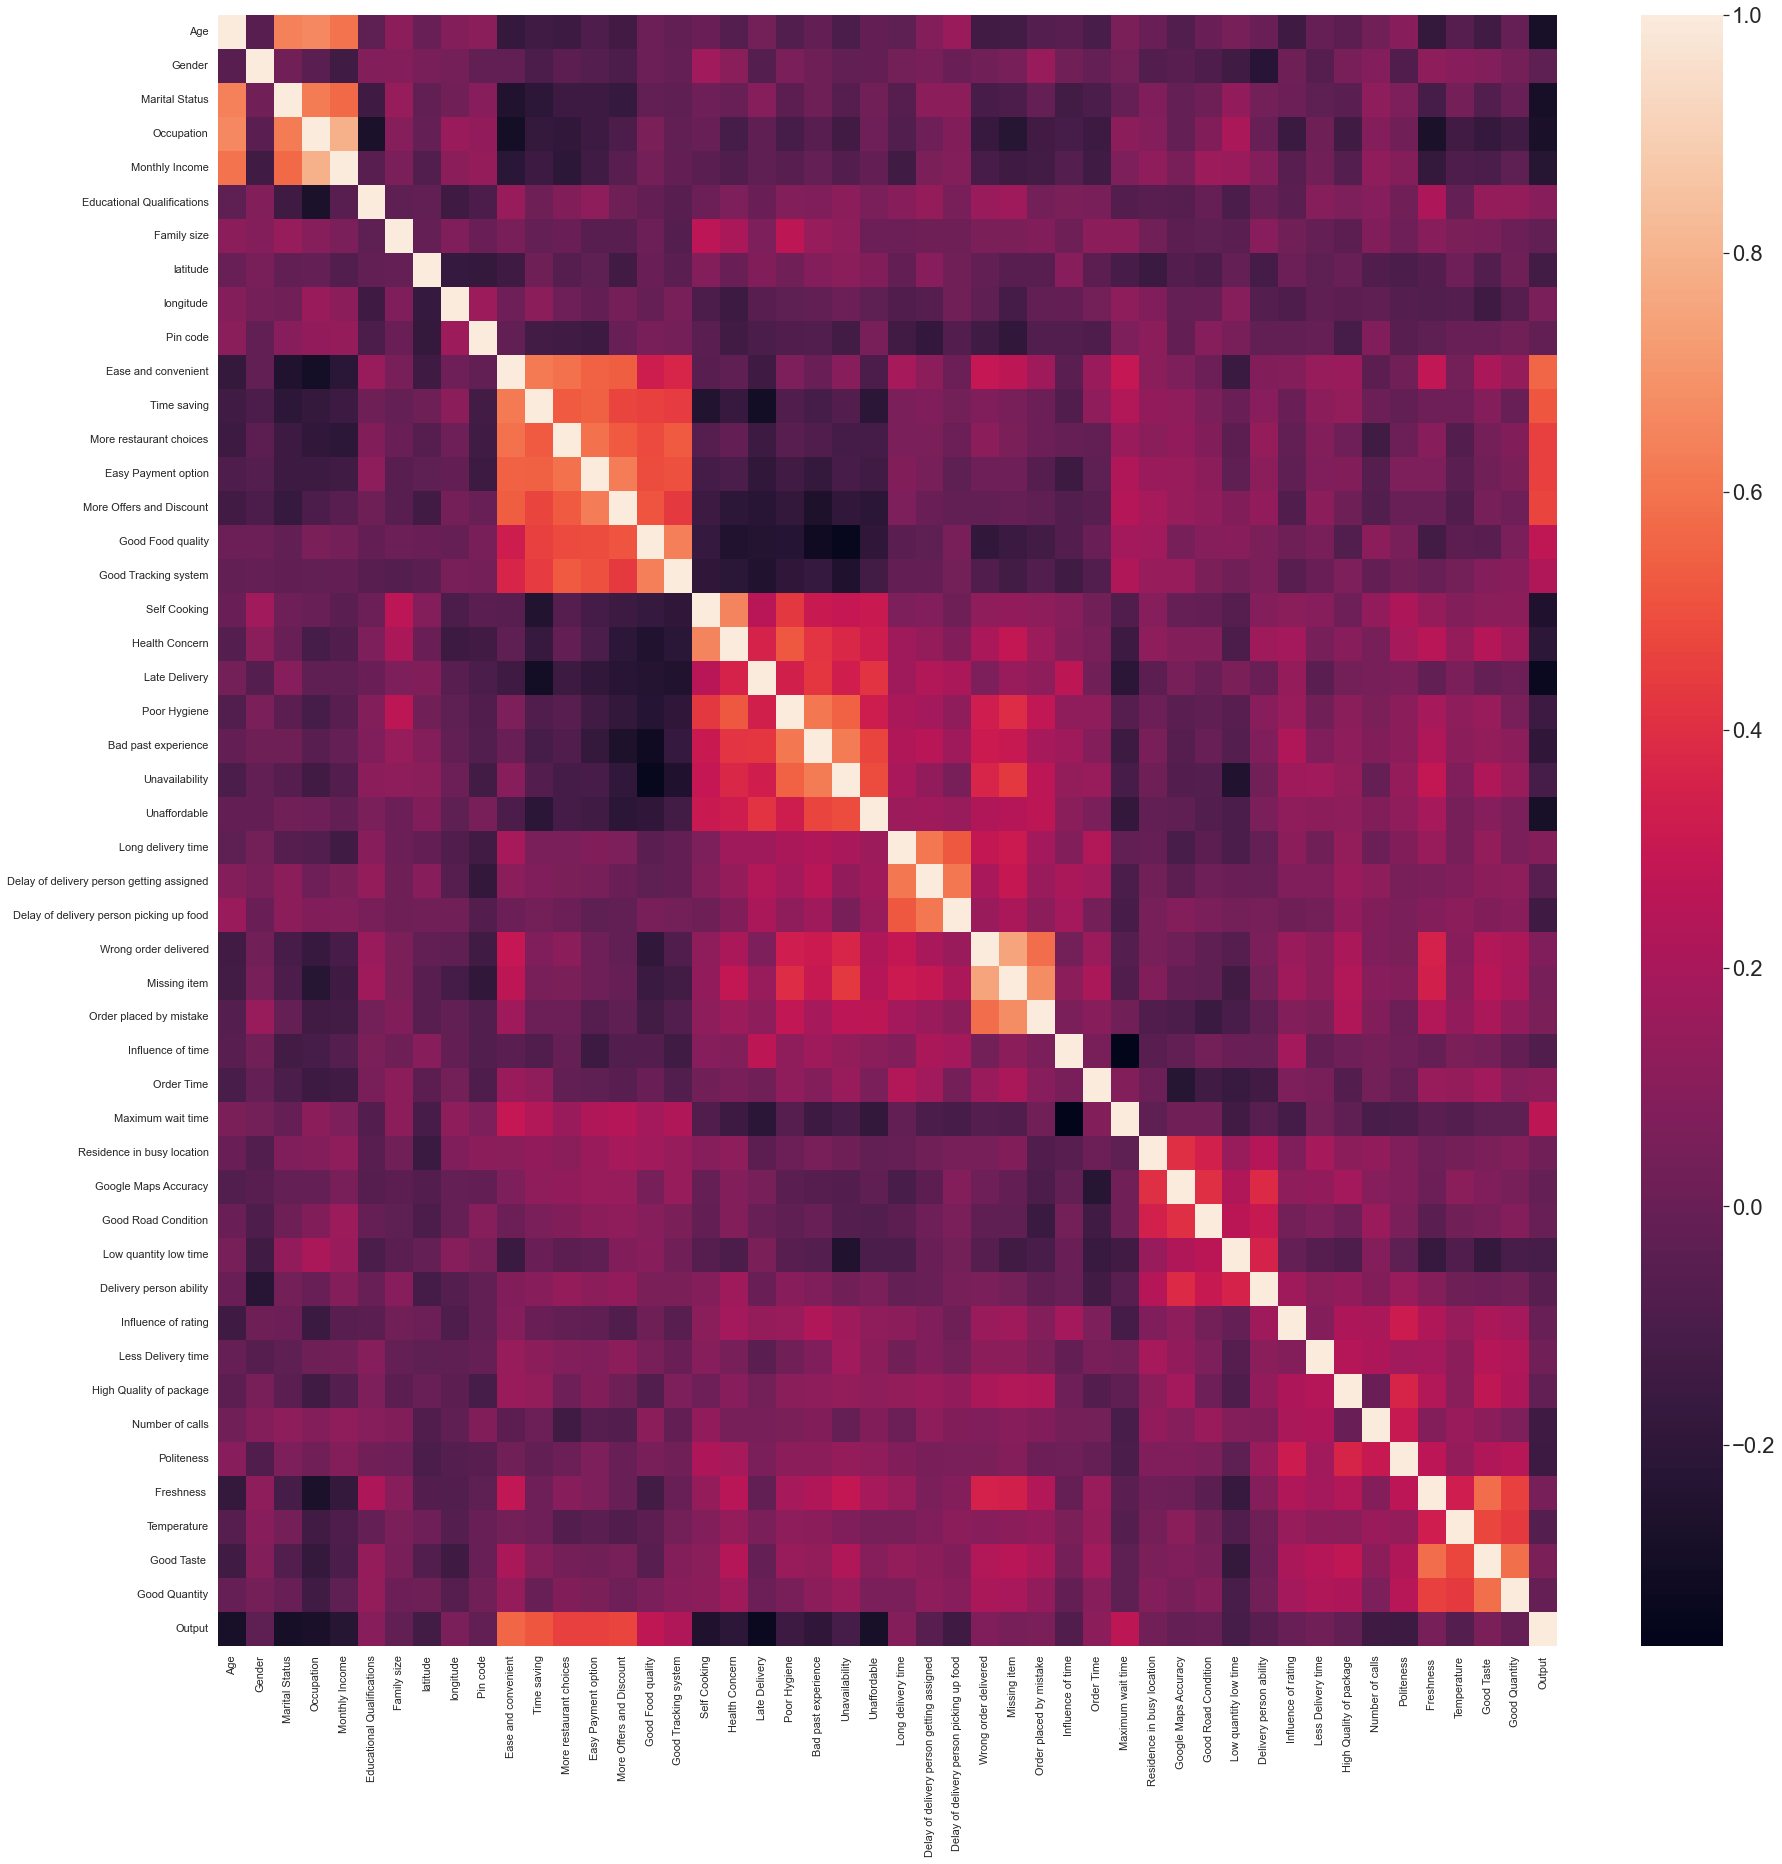

In [7]:
fig, ax = plt.subplots(figsize=(30,30))
sb.set(font_scale = 2.0)
sb.heatmap(corr, ax = ax)

From the heat map, we can observe that the following factors are has the most positive correlation with Output compared to the rest of the other factors.
- Ease and Convinient
- Time Saving
- More restaurant choices
- Easy Payment option
- More Offers and Discount

---

# Regression Modelling
To answer our question, we have chosen Logistic Regression and Random Forest regression models and have used Cross-Validation GridSearch to improve each of our models. 

### ROC_AUC
For our models, we shall use ROC-AUC score to determine the accuracy of the models.

The ROC-AUC is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. On the other hand, if the AUC = 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.

This means that the higher the ROC-AUC value, the model is better able to distinguish positives and negatives.

### Logistic Regression
The reason why we used Logistic Regression rather than using Linear Regression is because 
Linear Regression is a supervised Machine Learning algorithm that predicts continuous values. 

On the other hand, Logistic Regression is another supervised Machine Learning algorithm that helps fundamentally in binary classification. 

In our case, since Output consists of Yes/No, we have decided to use Logistic Regression.

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.932258064516129
Mean Squared Error (MSE) 	: 0.06774193548387097
Root Mean Squared Error (RMSE) 	: 0.2602728097283137

False Positive Rate 		: 0.18840579710144928
True Positive Rate 		: 0.966804979253112



Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9230769230769231
Mean Squared Error (MSE) 	: 0.07692307692307693
Root Mean Squared Error (RMSE) 	: 0.2773500981126146

False Positive Rate 		: 0.2222222222222222
True Positive Rate 		: 0.9666666666666667



<AxesSubplot:>

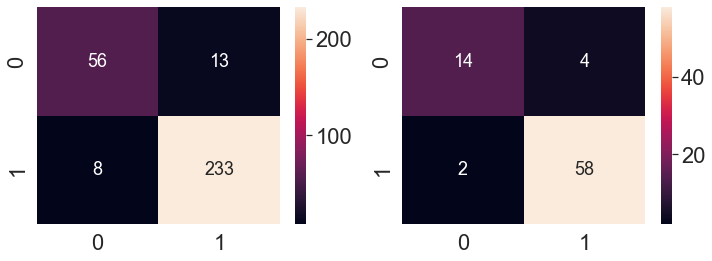

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


Input = foodDelivery.drop(['Output', 'Marital Status', 'Occupation', 'Monthly Income', 
                           'Educational Qualifications', 'Family size', "Medium (P1)", 
                           "Medium (P2)", "Meal(P1)", "Meal(P2)", "Perference(P1)", 
                           "Perference(P2)", 'Time saving', 'More restaurant choices', 
                           'Self Cooking', 'Influence of time', 'Order Time', 
                           'Residence in busy location', 'Google Maps Accuracy', 
                           'Good Road Condition', 'Influence of rating', "Reviews"], axis = 1)
sc = StandardScaler()
Input = sc.fit_transform(Input)
Output = foodDelivery['Output']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(Input, Output, test_size = 0.20, random_state = 0)
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_log, y_train_log)

y_train_pred_log = logreg.predict(X_train_log)
y_test_pred_log = logreg.predict(X_test_log)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_train_log, y_train_log))
print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_train_log, y_train_pred_log))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_log)))
print()


TN_train_log = metrics.confusion_matrix(y_train_log, y_train_pred_log)[0][0]
FP_train_log = metrics.confusion_matrix(y_train_log, y_train_pred_log)[0][1]
FN_train_log = metrics.confusion_matrix(y_train_log, y_train_pred_log)[1][0]
TP_train_log = metrics.confusion_matrix(y_train_log, y_train_pred_log)[1][1]

FPRate_train_log = FP_train_log / (TN_train_log + FP_train_log)
FNRate_train_log = FN_train_log / (TP_train_log + FN_train_log)
print("False Positive Rate \t\t:", FPRate_train_log)
print("True Positive Rate \t\t:", 1 - FNRate_train_log)

print()


print()
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_test_log, y_test_log))
print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_test_log, y_test_pred_log))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(y_test_log, y_test_pred_log)))
print()



# Check the Goodness of Fit (on Test Data)
TN_test_log = metrics.confusion_matrix(y_test_log, y_test_pred_log)[0][0]
FP_test_log = metrics.confusion_matrix(y_test_log, y_test_pred_log)[0][1]
FN_test_log = metrics.confusion_matrix(y_test_log, y_test_pred_log)[1][0]
TP_test_log = metrics.confusion_matrix(y_test_log, y_test_pred_log)[1][1]

FPRate_test_log = FP_test_log / (TN_test_log + FP_test_log)
FNRate_test_log = FN_test_log / (TP_test_log + FN_test_log)
print("False Positive Rate \t\t:", FPRate_test_log)
print("True Positive Rate \t\t:", 1 - FNRate_test_log)
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(metrics.confusion_matrix(y_train_log, y_train_pred_log),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(metrics.confusion_matrix(y_test_log, y_test_pred_log), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])






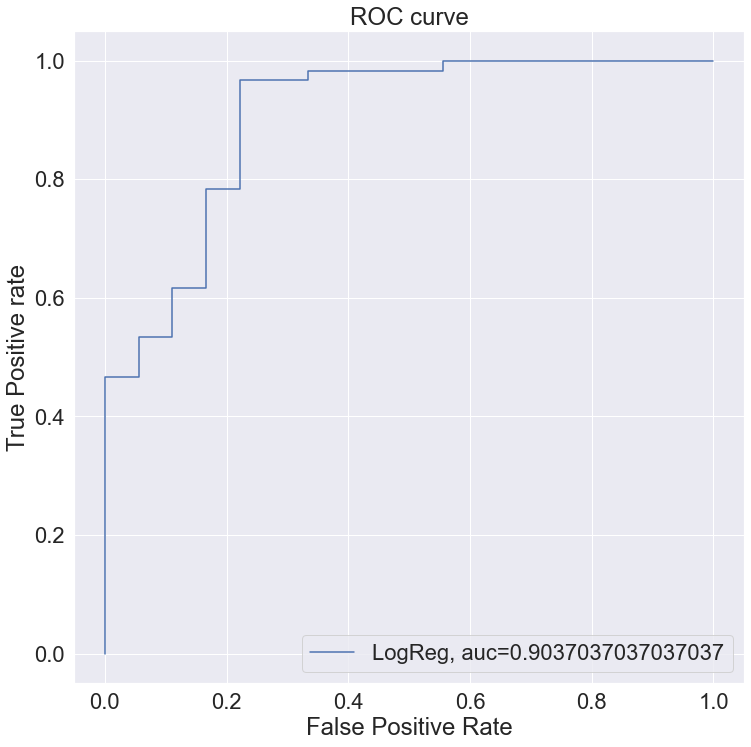

In [9]:
y_pred_proba_log = logreg.predict_proba(X_test_log)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_log, y_pred_proba_log)
auc = metrics.roc_auc_score(y_test_log, y_pred_proba_log)

plt.figure(figsize = (12, 12))
plt.plot(fpr,tpr,label="LogReg, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

### From the above plot, the ROC-AUC score is 90.3%

### Tuning Hyperparameters
After building our Logistic Regression model, we shall attempt to use cross validation method RepeatedStratifiedKFold, which repeats Stratified K-Fold n times with different randomizations in each repetition.

Thereafter, GridSearch is used to tune the hyperparameters for Logistic Regression.
The hyperparameters are:
- solvers
- penalty
- c_values

In [10]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# tuning the hyperparameters for Logistic Regression
# hyperparameters: solvers, penalty and c-values
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag','saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_log, y_train_log)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))




Best: 0.907527 using {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.876344 (0.047907) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.876344 (0.047907) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.877419 (0.047409) with: {'C': 100, 'penalty': 'none', 'solver': 'sag'}
0.881720 (0.045873) with: {'C': 100, 'penalty': 'none', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.876344 (0.047907) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'sag'}
0.881720 (0.045873) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.876344 (0.047907) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.876344 (0.047907) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.877419 (0.047409) with: {'

---
### Results of Cross Validation and Grid Search:
From the CrossValidation and GridSearch, the following hyperparameters are found to give the best score:
- C = 0.1
- penalty = l1
- solver = liblinear

We shall then tune the hyperparameters of the Logistic Regression accordingly.

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9193548387096774
Mean Squared Error (MSE) 	: 0.08064516129032258
Root Mean Squared Error (RMSE) 	: 0.2839809171235324

False Positive Rate 		: 0.2753623188405797
True Positive Rate 		: 0.975103734439834




Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9102564102564102
Mean Squared Error (MSE) 	: 0.08974358974358974
Root Mean Squared Error (RMSE) 	: 0.29957234475763905

False Positive Rate 		: 0.3333333333333333
True Positive Rate 		: 0.9833333333333333



<AxesSubplot:>

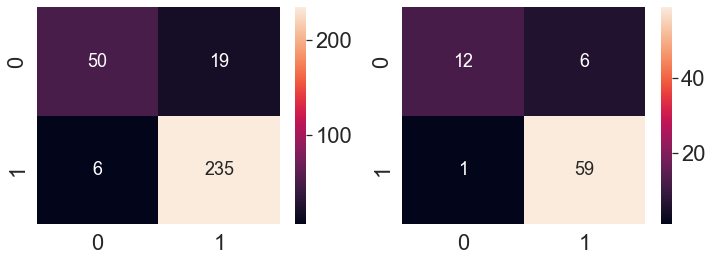

In [11]:
logreg = LogisticRegression(random_state=0, C=0.1, penalty = 'l1', solver='liblinear')
logreg.fit(X_train_log, y_train_log)

y_train_pred_log = logreg.predict(X_train_log)
y_test_pred_log = logreg.predict(X_test_log)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_train_log, y_train_log))
print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_train_log, y_train_pred_log))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred_log)))
print()


TN_train_log = metrics.confusion_matrix(y_train_log, y_train_pred_log)[0][0]
FP_train_log = metrics.confusion_matrix(y_train_log, y_train_pred_log)[0][1]
FN_train_log = metrics.confusion_matrix(y_train_log, y_train_pred_log)[1][0]
TP_train_log = metrics.confusion_matrix(y_train_log, y_train_pred_log)[1][1]

FPRate_train_log = FP_train_log / (TN_train_log + FP_train_log)
FNRate_train_log = FN_train_log / (TP_train_log + FN_train_log)
print("False Positive Rate \t\t:", FPRate_train_log)
print("True Positive Rate \t\t:", 1 - FNRate_train_log)

print()


print()
print()
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_test_log, y_test_log))
print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_test_log, y_test_pred_log))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(y_test_log, y_test_pred_log)))
print()



# Check the Goodness of Fit (on Test Data)
TN_test_log = metrics.confusion_matrix(y_test_log, y_test_pred_log)[0][0]
FP_test_log = metrics.confusion_matrix(y_test_log, y_test_pred_log)[0][1]
FN_test_log = metrics.confusion_matrix(y_test_log, y_test_pred_log)[1][0]
TP_test_log = metrics.confusion_matrix(y_test_log, y_test_pred_log)[1][1]

FPRate_test_log = FP_test_log / (TN_test_log + FP_test_log)
FNRate_test_log = FN_test_log / (TP_test_log + FN_test_log)
print("False Positive Rate \t\t:", FPRate_test_log)
print("True Positive Rate \t\t:", 1 - FNRate_test_log)
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(metrics.confusion_matrix(y_train_log, y_train_pred_log),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(metrics.confusion_matrix(y_test_log, y_test_pred_log), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

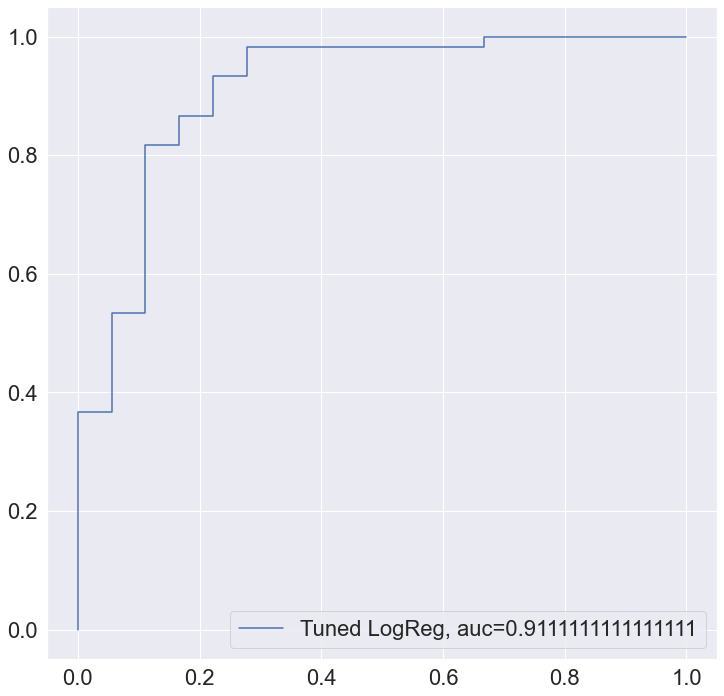

In [12]:
y_pred_proba_log = logreg.predict_proba(X_test_log)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_log, y_pred_proba_log)
auc = metrics.roc_auc_score(y_test_log, y_pred_proba_log)

plt.figure(figsize = (12, 12))
plt.plot(fpr,tpr,label="Tuned LogReg, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

### Improvement!
From the ROC-AUC score, we can see that after the tuning the hyperparameters using Cross Validation and Grid Search, our model has improved, as the ROC-AUC score has improved from 90.3% to 91.1%

---
### RandomForestClassifier

Similar to Logistic Regression, Random Forest Classifier is another model that makes use of the averages of many decision trees to do binary classification.

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0
Root Mean Squared Error (RMSE) 	: 0.0

False Positive Rate 		: 0.0
True Positive Rate 		: 1.0



Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9102564102564102
Mean Squared Error (MSE) 	: 0.0641025641025641
Root Mean Squared Error (RMSE) 	: 0.25318484177091666

False Positive Rate 		: 0.2222222222222222
True Positive Rate 		: 0.9833333333333333



<AxesSubplot:>

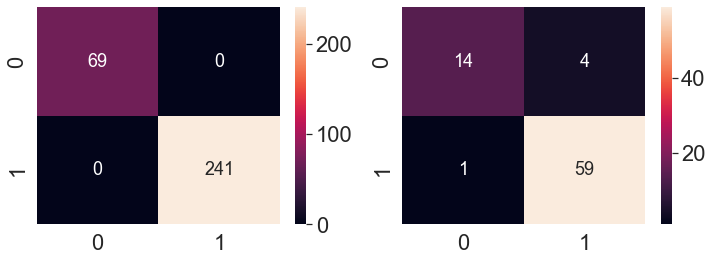

In [13]:
from sklearn.ensemble import RandomForestClassifier

X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(Input, Output, test_size = 0.20, random_state = 0)
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_forest, y_train_forest)

y_train_pred_forest = forest.predict(X_train_forest)
y_test_pred_forest = forest.predict(X_test_forest)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", forest.score(X_train_forest, y_train_forest))
print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_train_forest, y_train_pred_forest))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(y_train_forest, y_train_pred_forest)))
print()


TN_train_forest = metrics.confusion_matrix(y_train_forest, y_train_pred_forest)[0][0]
FP_train_forest = metrics.confusion_matrix(y_train_forest, y_train_pred_forest)[0][1]
FN_train_forest = metrics.confusion_matrix(y_train_forest, y_train_pred_forest)[1][0]
TP_train_forest = metrics.confusion_matrix(y_train_forest, y_train_pred_forest)[1][1]

FPRate_train_forest = FP_train_forest / (TN_train_forest + FP_train_forest)
FNRate_train_forest = FN_train_forest / (TP_train_forest + FN_train_forest)
print("False Positive Rate \t\t:", FPRate_train_forest)
print("True Positive Rate \t\t:", 1 - FNRate_train_forest)

print()

print()
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_test_forest, y_test_forest))
print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_test_forest, y_test_pred_forest))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(y_test_forest, y_test_pred_forest)))
print()



# Check the Goodness of Fit (on Test Data)
TN_test_forest = metrics.confusion_matrix(y_test_forest, y_test_pred_forest)[0][0]
FP_test_forest = metrics.confusion_matrix(y_test_forest, y_test_pred_forest)[0][1]
FN_test_forest = metrics.confusion_matrix(y_test_forest, y_test_pred_forest)[1][0]
TP_test_forest = metrics.confusion_matrix(y_test_forest, y_test_pred_forest)[1][1]

FPRate_test_forest = FP_test_forest / (TN_test_forest + FP_test_forest)
FNRate_test_forest = FN_test_forest / (TP_test_forest + FN_test_forest)
print("False Positive Rate \t\t:", FPRate_test_forest)
print("True Positive Rate \t\t:", 1 - FNRate_test_forest)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(metrics.confusion_matrix(y_train_forest, y_train_pred_forest),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(metrics.confusion_matrix(y_test_forest, y_test_pred_forest), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])






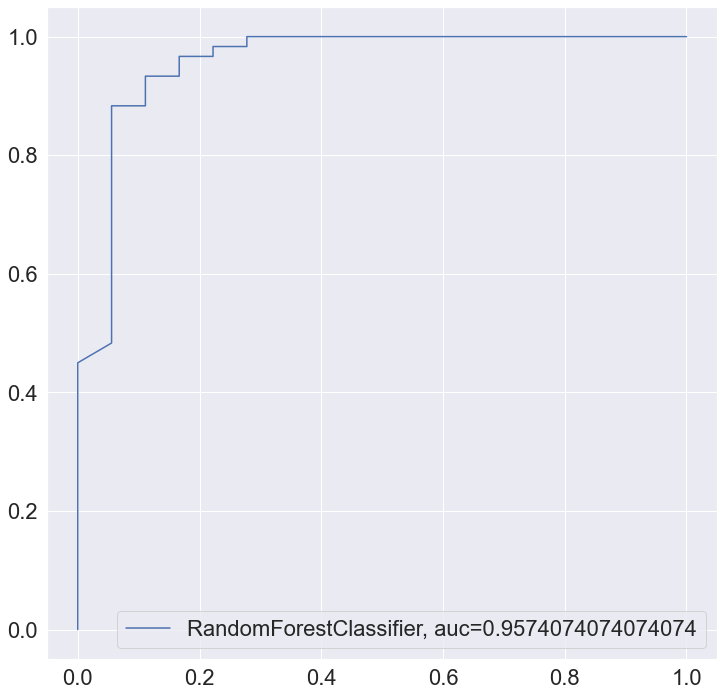

In [14]:
y_pred_proba_forest = forest.predict_proba(X_test_forest)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_forest, y_pred_proba_forest)
auc = metrics.roc_auc_score(y_test_forest, y_pred_proba_forest)

plt.figure(figsize = (12, 12))
plt.plot(fpr,tpr,label="RandomForestClassifier, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

### Tuning Hyperparameters
Likewise, we shall attempt to improve on the model using Cross Validation and GridSearch to tune the hyperparameters for RandomForest.
The hyperparameters are:
- n_estimators
- max_depth
- max_features

In [15]:
n_estimators = [100, 200, 300, 400]
max_depth = [i for i in range(5,15)]
max_features= ['sqrt', 'log2']

grid = dict(n_estimators=n_estimators,max_depth=max_depth, max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=forest, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_log, y_train_log)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.936559 using {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
0.911828 (0.045569) with: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
0.913978 (0.044334) with: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
0.915054 (0.042046) with: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 300}
0.913978 (0.042741) with: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 400}
0.911828 (0.045569) with: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}
0.913978 (0.044334) with: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}
0.915054 (0.042046) with: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 300}
0.913978 (0.042741) with: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 400}
0.920430 (0.043064) with: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}
0.919355 (0.040591) with: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200}
0.927957 (0.040533) with: {'max_depth

### Results of Cross Validation and Grid Search:
From the CrossValidation and GridSearch, the following hyperparameters are found to give the best score for RandomForestClassifier:
- max_features = sqrt
- n_estimators = 200
- max_depth = 8

We shall then tune the hyperparameters of the RandomForest accordingly.

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9935483870967742
Mean Squared Error (MSE) 	: 0.0064516129032258064
Root Mean Squared Error (RMSE) 	: 0.08032193289024989

False Positive Rate 		: 0.028985507246376812
True Positive Rate 		: 1.0


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9102564102564102
Mean Squared Error (MSE) 	: 0.07692307692307693
Root Mean Squared Error (RMSE) 	: 0.2773500981126146

False Positive Rate 		: 0.2777777777777778
True Positive Rate 		: 0.9833333333333333



<AxesSubplot:>

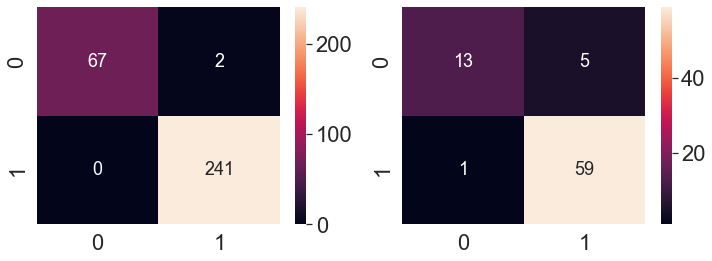

In [16]:
forest = RandomForestClassifier(max_features='sqrt', n_estimators=200, max_depth = 8,random_state=0)
forest.fit(X_train_forest, y_train_forest)

y_train_pred_forest = forest.predict(X_train_forest)
y_test_pred_forest = forest.predict(X_test_forest)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", forest.score(X_train_forest, y_train_forest))
print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_train_forest, y_train_pred_forest))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(y_train_forest, y_train_pred_forest)))
print()


TN_train_forest = metrics.confusion_matrix(y_train_forest, y_train_pred_forest)[0][0]
FP_train_forest = metrics.confusion_matrix(y_train_forest, y_train_pred_forest)[0][1]
FN_train_forest = metrics.confusion_matrix(y_train_forest, y_train_pred_forest)[1][0]
TP_train_forest = metrics.confusion_matrix(y_train_forest, y_train_pred_forest)[1][1]

FPRate_train_forest = FP_train_forest / (TN_train_forest + FP_train_forest)
FNRate_train_forest = FN_train_forest / (TP_train_forest + FN_train_forest)
print("False Positive Rate \t\t:", FPRate_train_forest)
print("True Positive Rate \t\t:", 1 - FNRate_train_forest)

print()

print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_test_forest, y_test_forest))
print("Mean Squared Error (MSE) \t:", metrics.mean_squared_error(y_test_forest, y_test_pred_forest))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(y_test_forest, y_test_pred_forest)))
print()



# Check the Goodness of Fit (on Test Data)
TN_test_forest = metrics.confusion_matrix(y_test_forest, y_test_pred_forest)[0][0]
FP_test_forest = metrics.confusion_matrix(y_test_forest, y_test_pred_forest)[0][1]
FN_test_forest = metrics.confusion_matrix(y_test_forest, y_test_pred_forest)[1][0]
TP_test_forest = metrics.confusion_matrix(y_test_forest, y_test_pred_forest)[1][1]

FPRate_test_forest = FP_test_forest / (TN_test_forest + FP_test_forest)
FNRate_test_forest = FN_test_forest / (TP_test_forest + FN_test_forest)
print("False Positive Rate \t\t:", FPRate_test_forest)
print("True Positive Rate \t\t:", 1 - FNRate_test_forest)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(metrics.confusion_matrix(y_train_forest, y_train_pred_forest),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(metrics.confusion_matrix(y_test_forest, y_test_pred_forest), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])




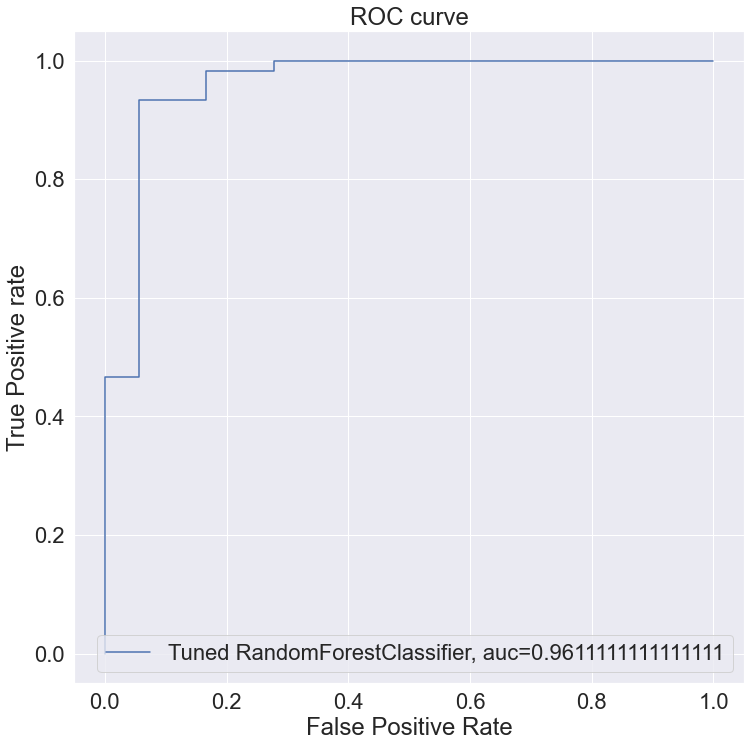

In [18]:
y_pred_proba_forest = forest.predict_proba(X_test_forest)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_forest, y_pred_proba_forest)
auc = metrics.roc_auc_score(y_test_forest, y_pred_proba_forest)

plt.figure(figsize = (12, 12))
plt.plot(fpr,tpr,label="Tuned RandomForestClassifier, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

### Improvement again!
Similar to to our previous Cross Validation and GridSearch of the Logistic Regression model, we can see that after the tuning the hyperparameters using Cross Validation and Grid Search, our model has improved, as the ROC-AUC score has improved from 95.7% to 96.1%